In [2]:
# Importing all needed libraries and functions
import os
import sys
sys.path.append("../src")
from functions import data_clean, plot_model_results_final, OverfittingAnalyzer, evaluate_microbiome_models_test

## Bonus 1: Using optuna for hyperparameter tuning

### Importing data and training the regression models

In [3]:
data_dev = data_clean('../data/assignment1_dev_set.csv')
data_val = data_clean('../data/assignment1_val_set.csv')


No NA values found.

No NA values found.


In [4]:
results_ml_optuna, feature_importances_optuna, s_optuna, best_optuna_model = evaluate_microbiome_models_test(data_dev, data_val, feature_selection_method='variance', use_optuna=True, optuna_trials=10)

Models will be saved to: /home/sotiriosd33/Desktop/Machine learning in computational biology/Assgnment_1/Assignment-1/models

=== Evaluating ElasticNet ===
Using Optuna for hyperparameter optimization...
Optimizing model - 10 trials... Best neg_root_mean_squared_error: -3.8451
Using Optuna for hyperparameter optimization...
Optimizing model - 10 trials... Best neg_root_mean_squared_error: -3.6966
Using Optuna for hyperparameter optimization...
Optimizing model - 10 trials... Best neg_root_mean_squared_error: -3.8802
Using Optuna for hyperparameter optimization...
Optimizing model - 10 trials... Best neg_root_mean_squared_error: -3.5760
Using Optuna for hyperparameter optimization...
Optimizing model - 10 trials... Best neg_root_mean_squared_error: -4.1840
Saved ElasticNet model to ../models/ElasticNet_20250410_094139.joblib

=== Evaluating BayesianRidge ===
Using Optuna for hyperparameter optimization...
Optimizing model - 10 trials... Best neg_root_mean_squared_error: -3.8399
Using Op

### Ploting the results and checking for overfitting

In [5]:
feature_importances_optuna

,Model,feature,importance
0,ElasticNet,Clostridium symbiosum,0.406417
1,ElasticNet,Ruminococcus champanellensis,0.193389
2,ElasticNet,Odoribacter splanchnicus,0.191563
3,ElasticNet,Eubacterium dolichum,0.189236
4,ElasticNet,Parabacteroides johnsonii,0.185694
...,...,...,...
400,SVM,Streptococcus mitis,NaN
401,SVM,Streptococcus oralis,NaN
402,SVM,Sutterella parvirubra,NaN
403,SVM,Thermobaculum terrenum,NaN


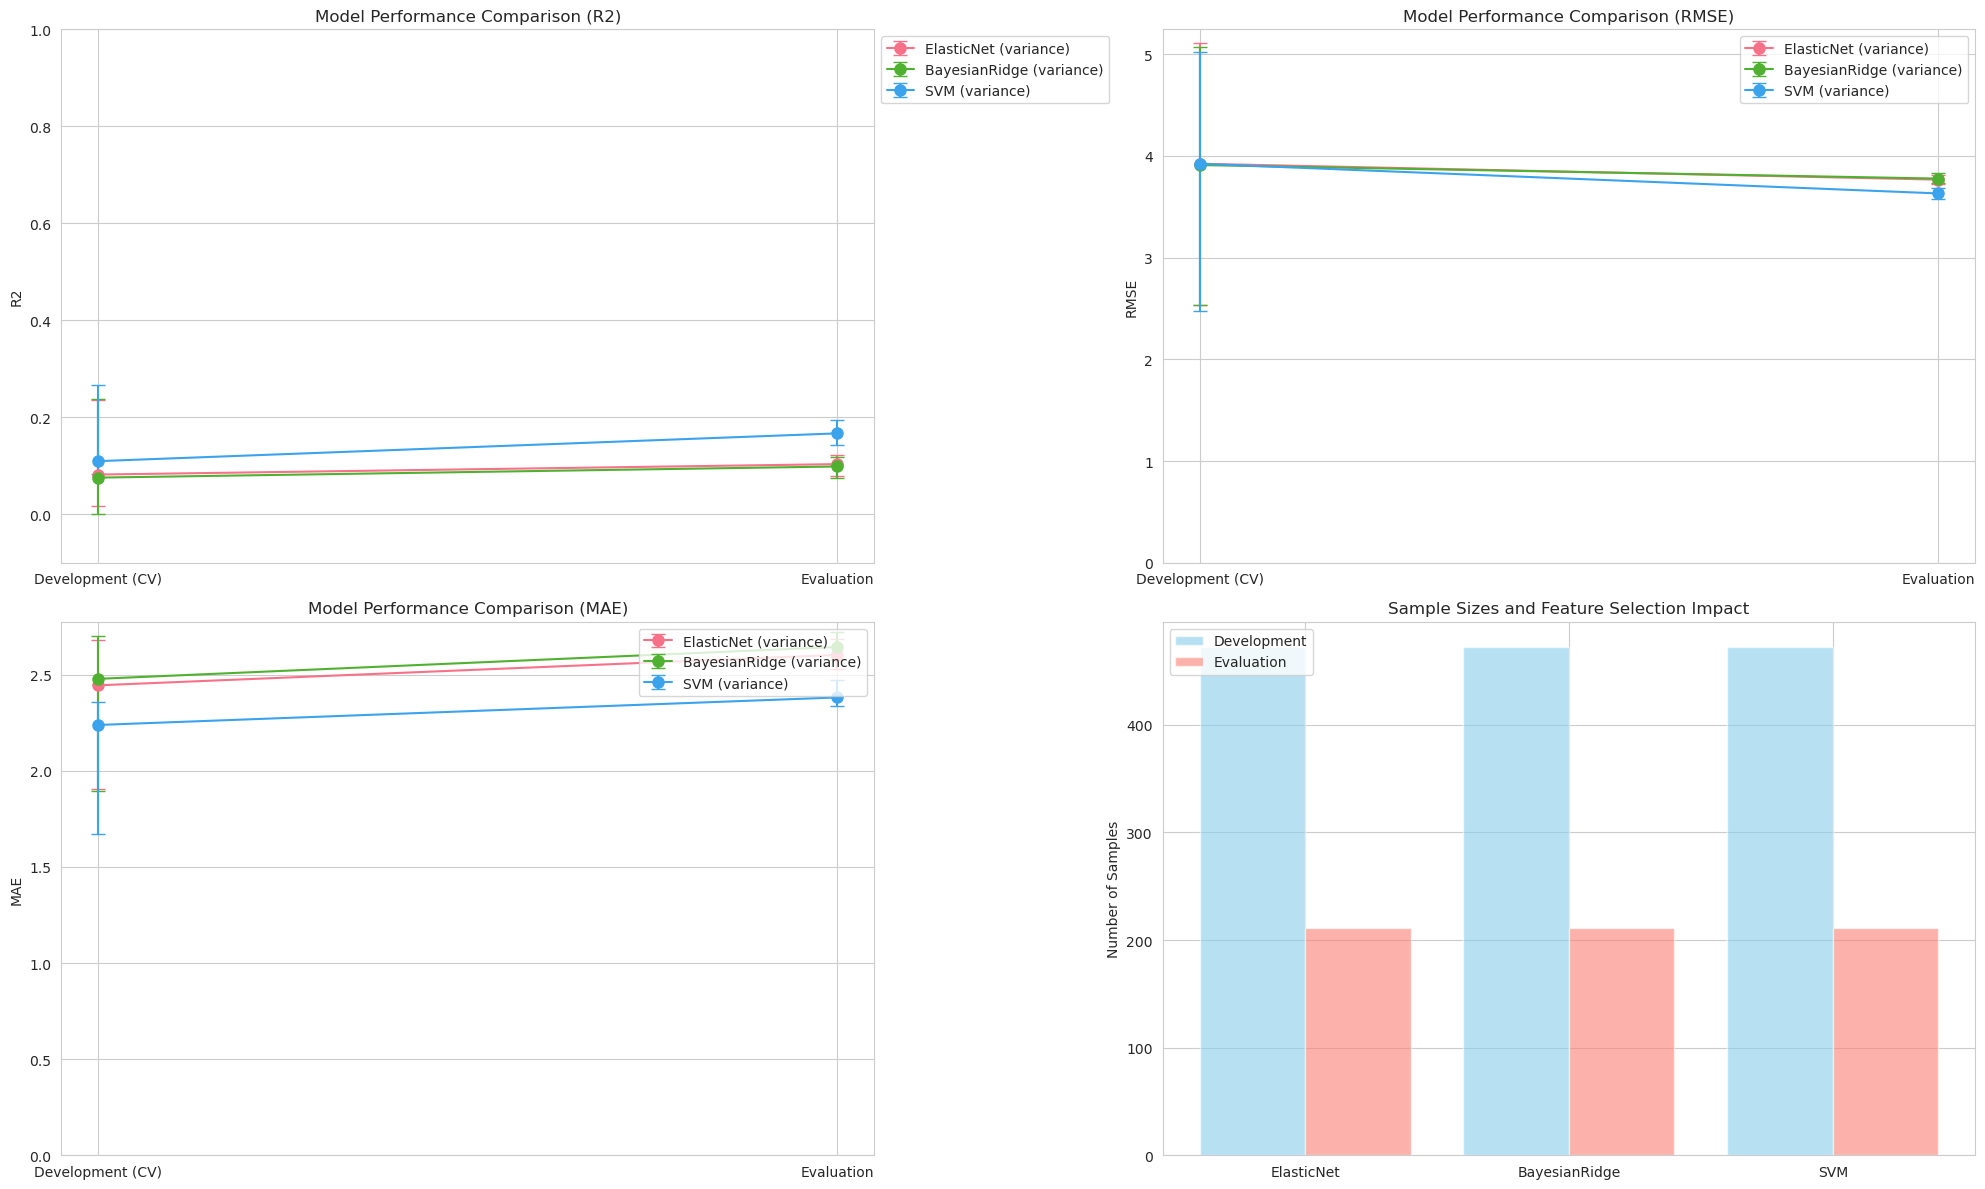


=== Detailed Performance Metrics ===

R2 Scores (median with 95% CI):


,Model,Feature_Selection,Dev_R2,Eval_R2
0,ElasticNet,variance,0.082 (0.018-0.235),0.103 (0.080-0.123)
1,BayesianRidge,variance,0.076 (0.001-0.238),0.099 (0.074-0.119)
2,SVM,variance,0.110 (0.083-0.266),0.167 (0.144-0.194)



RMSE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_RMSE,Eval_RMSE
0,ElasticNet,variance,3.923 (2.539-5.112),3.766 (3.725-3.816)
1,BayesianRidge,variance,3.910 (2.536-5.072),3.777 (3.734-3.828)
2,SVM,variance,3.923 (2.473-5.018),3.631 (3.572-3.681)



MAE Scores (median with 95% CI):


,Model,Feature_Selection,Dev_MAE,Eval_MAE
0,ElasticNet,variance,2.445 (1.905-2.680),2.603 (2.532-2.687)
1,BayesianRidge,variance,2.479 (1.894-2.703),2.644 (2.575-2.723)
2,SVM,variance,2.239 (1.672-2.358),2.382 (2.335-2.474)


In [6]:
plot_model_results_final(results_ml_optuna)

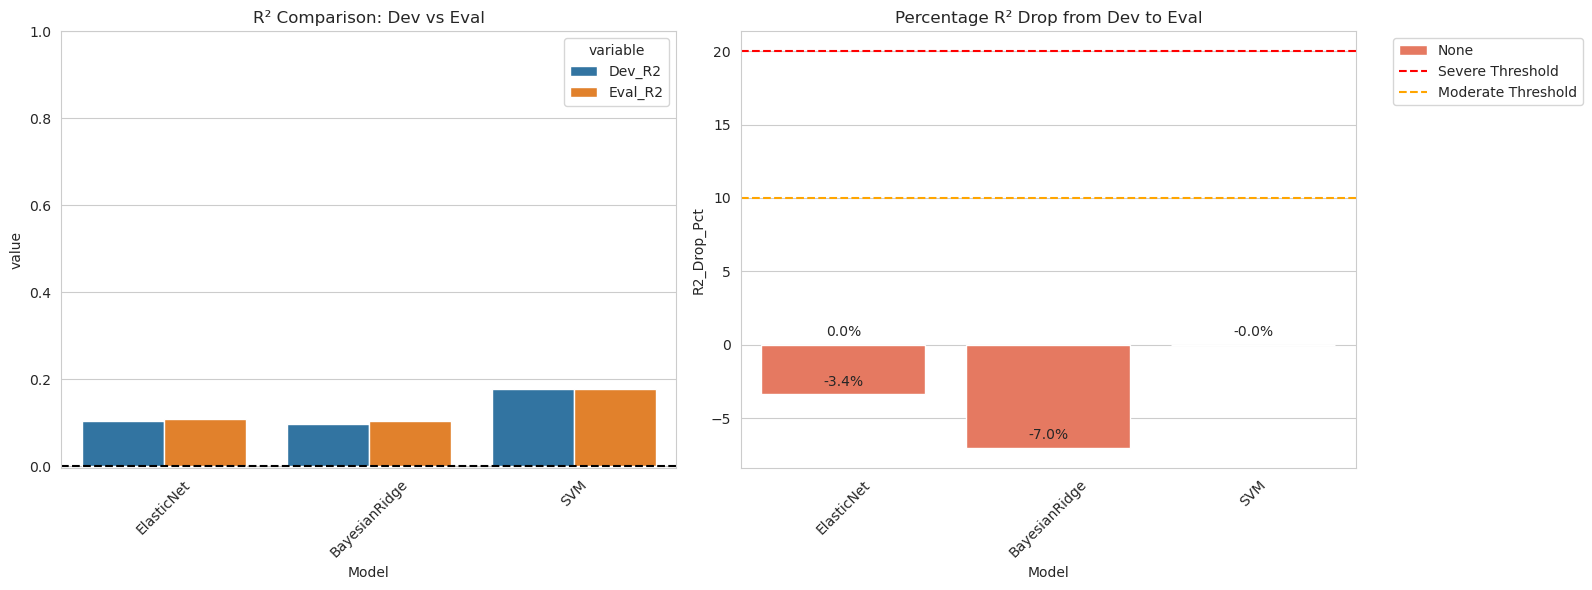

Overfitting status: none
Failed checks: []


,Model,Feature_Selection,Dev_R2,Eval_R2,R2_Drop_Pct,Dev_RMSE,Eval_RMSE,RMSE_Increase_Pct,Dev_Eval_Ratio,Overfitting_Risk
0,ElasticNet,None,0.104146,0.107658,-3.371595,3.747757,3.757446,0.258532,0.967384,Low
1,BayesianRidge,None,0.096253,0.103023,-7.034096,3.760026,3.767184,0.190390,0.934282,Low
2,SVM,None,0.178075,0.178086,-0.006331,3.615792,3.606136,-0.267041,0.999937,Low


In [7]:
# Initialize analyzer with threshold
analyzer = OverfittingAnalyzer(threshold=0.2)

# Perform complete analysis with visualization
results = analyzer.analyze(results_ml_optuna, plot=True)

# Access analysis components
print("Overfitting status:", results['overfitting_status'])
print("Failed checks:", results['failed_checks'])
display(results['metrics'].style.background_gradient(
    subset=['R2_Drop_Pct', 'RMSE_Increase_Pct'], 
    cmap='Reds'
))